In [2]:
from Constrained_Functions import *
from penguins_Algorithm_modified_3 import *
from ParticleSwarm import *

In [20]:
# EPOWIV(LB, UB, dim, pop_size, MaxItr, R, fn)
EPOWIV(-16384, 16384, 16, 50, 100, 1, 2)

(5.0, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [21]:
PCA(-16384, 16384, 16, 50, 100, 1, 2)

(6227.2091430147275,
 array([-7.97486755e+03,  1.52681524e+03,  1.45117104e+03,  7.75911757e+03,
         9.85566078e+03, -8.23451843e+03, -3.55690627e+03, -1.50631605e+04,
         4.28788838e+03,  7.20454134e+03, -6.91517034e+03, -7.93060708e+03,
        -1.66038105e+03,  2.07315454e+00,  9.81371324e+03,  1.44723566e+04]))

In [22]:
PCAWeighted(-16384, 16384, 16, 50, 100, 1, 2)

(17.48672460121204,
 array([ 0.56553756, -0.54656266, -5.03102835,  1.75646904,  3.28714758,
        -0.24621065,  6.66890562, -0.75669753, -4.62459992,  2.21854263,
        -4.34459572,  2.3071959 , -4.29099329, -2.19793752, -2.78582264,
        -6.2964359 ]))

In [14]:
PCA_classic(-16384, 16384, 16, 50, 100, 1, 2)

(11161.539737835312,
 array([ -2283.28152662,   3285.56366469,  -4344.96314916,  -6702.08863843,
           -51.81456305, -10398.34135007,   9835.49475063,   9387.99645285,
          1182.2269561 ,   3866.24015996,   3915.44332689,  10434.52377002,
           996.12119742,   7338.36000396,  -5608.24641821, -13742.40425293]))

In [23]:
import pandas as pd


In [25]:
CECProblems = pd.read_csv('CEC.csv')

In [28]:
type(CECProblems.iloc[0, 0])

numpy.int64

In [29]:
output = {}
ComparativeResultsMeans = {'Function':[],'EPOWIV Mean':[], 'EPOIV Mean':[], 'EPOW Mean': [], 'EPO Classical Mean':[]}
ComparativeResultsStd = {'EPOWIV Std':[], 'EPOIV Std':[], 'EPOW Std': [], 'EPO Classical Std':[]}
for i  in range(CECProblems.shape[0]):
    fn = CECProblems.iloc[i, 0]
    FunctionName = CECProblems.iloc[i, 1]
    LB = CECProblems.iloc[i, 4]
    UB = CECProblems.iloc[i, 5]
    dim = CECProblems.iloc[i, 3]
    if FunctionName not in output:
        output[FunctionName] = {}
    output[FunctionName]['EPOWIV'] = [EPOWIV(LB, UB, dim, 50, 100, 1, fn)[0] for _ in range(30)]
    output[FunctionName]['EPOIV'] = [PCA(LB, UB, dim, 50, 80, 1, fn)[0] for _ in range(30)]
    output[FunctionName]['EPOW'] = [PCAWeighted(LB, UB, dim, 50, 50, 1, fn)[0] for _ in range(30)]
    output[FunctionName]['EPO Classical'] = [PCA_classic(LB, UB, dim, 50, 50, 1, fn)[0] for _ in range(30)]

In [32]:
keys = list(ComparativeResultsMeans.keys())
keys0 = list(ComparativeResultsStd.keys())

In [33]:
for FunctionName in output:
    ComparativeResultsMeans[keys[0]].append(FunctionName)
    ComparativeResultsMeans[keys[1]].append(np.array(output[FunctionName]['EPOWIV']).mean())
    ComparativeResultsMeans[keys[2]].append(np.array(output[FunctionName]['EPOIV']).mean())
    ComparativeResultsMeans[keys[3]].append(np.array(output[FunctionName]['EPOW']).mean())
    ComparativeResultsMeans[keys[4]].append(np.array(output[FunctionName]['EPO Classical']).mean())
    
    ComparativeResultsStd[keys0[0]].append(np.array(output[FunctionName]['EPOWIV']).std())
    ComparativeResultsStd[keys0[1]].append(np.array(output[FunctionName]['EPOIV']).std())
    ComparativeResultsStd[keys0[2]].append(np.array(output[FunctionName]['EPOW']).std())
    ComparativeResultsStd[keys0[3]].append(np.array(output[FunctionName]['EPO Classical']).std())
    

In [34]:
pd.concat([pd.DataFrame(ComparativeResultsMeans), pd.DataFrame(ComparativeResultsStd)], axis=1).to_csv('ConstrainedReultsCEC.csv', index = False)


In [36]:
import matplotlib.pyplot as plt

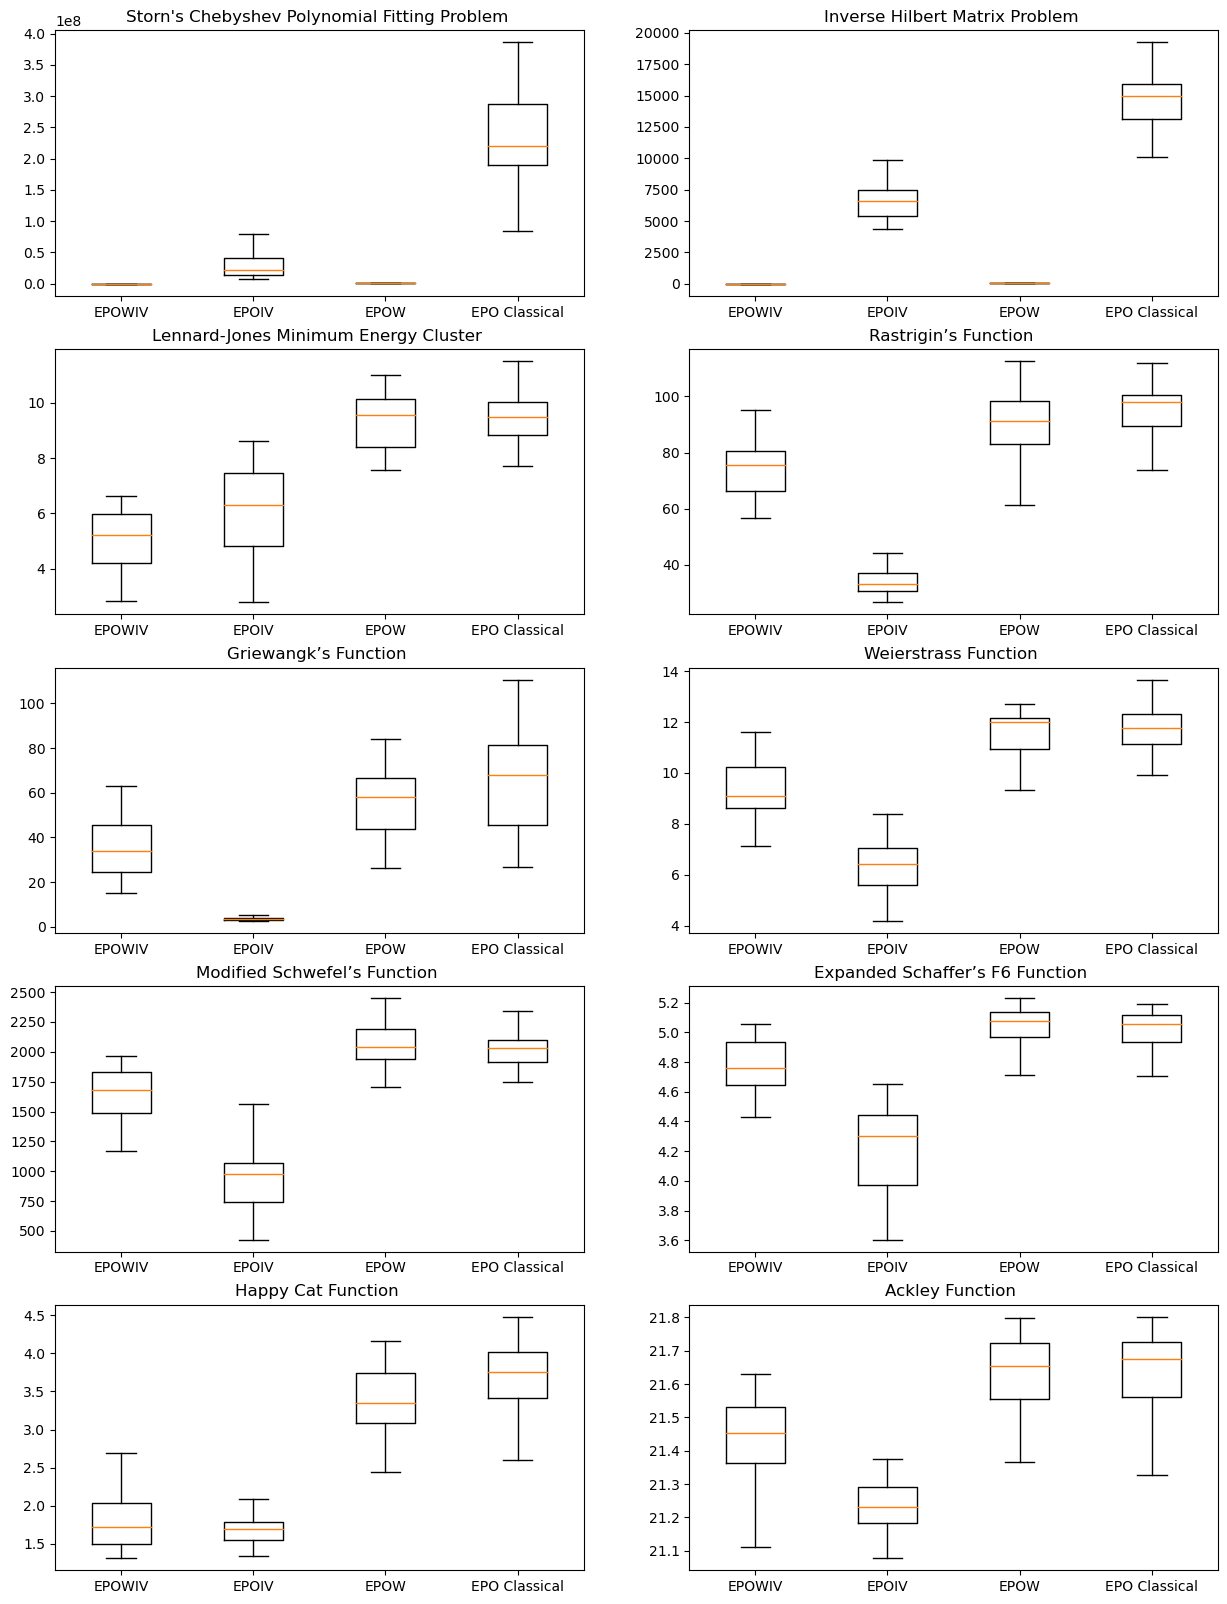

In [40]:
fig = plt.figure(figsize= (15, 20))
labels = ['EPOWIV', 'EPOIV', 'EPOW', 'EPO Classical']
j = 1
for FunctionName in output:
    ax = fig.add_subplot(5, 2, j)
    plt.boxplot([output[FunctionName]['EPOWIV'], output[FunctionName]['EPOIV'], output[FunctionName]['EPOW']\
                ,output[FunctionName]['EPO Classical']], showfliers=False, labels=labels)
    ax.set_title(FunctionName)
    j +=1